Derivation based on https://www.bradyneal.com/slides/1%20-%20A%20Brief%20Introduction%20to%20Causal%20Inference.pdf

# Theory

Notations:

* $T$: observed treatment
* $Y$: observed outcome
* $i$: used in subscript to denote a specific unit/individual
* $Y_i(1) \triangleq Y_i|_{do(T=1)}$: potential outcome under treatment
* $Y_i(0) \triangleq Y_i|_{do(T=0)}$ : potential outcome under no treatment
* $Y(t) \triangleq Y|_{do(T=t)}$: population-level potential outcome

**Individual treatment effect** (ITE, aka. causal effect for a given $i$) is defined as 

$$\Delta_i \triangleq Y_i(1) - Y_i(0)$$

The **fundamental problem of causal inference** is that for a given $i$, only $Y_i(1)$ or $Y_i(0)$ is observable.

**Average treatment effect** is as the expectation of $\Delta$:

\begin{align*}
\mathbb{E}[\Delta_i]
&= \mathbb{E}[Y_i(1) - Y_i(0)] \\
&= \mathbb{E}[Y(1)] - \mathbb{E}[Y(0)] \\
&\neq \mathbb{E}[Y|T=1] - \mathbb{E}[Y|T=0]
\end{align*}

The inequality is due to correlation does not imply causation. The inequality would become equality if $i$ is randomly assigned treatment or not, i.e. goes through randomized control trials (RCT).

For observational data, we need to adjust/control for confounders to do causal inference.

If $W$ is a **sufficient adjustment set**, we have

\begin{align*}
\mathbb{E}[Y(t)|W=w] 
&\triangleq \mathbb{E}[Y|_{do(T=t)}, W=w] \\
&=\mathbb{E}[Y|t, w]
\end{align*}

then, marginalize $W$,

\begin{align*}
\mathbb{E}[Y(t)]
&\triangleq \mathbb{E}[Y|_{do(T=t)}] \\
&= \mathbb{E}_W \mathbb{E}[Y|t, W]
\end{align*}

Note, 

* the small $t$ means $do(T=t)$ and it's not a random variable.
* the second expectation as in $\mathbb{E}[Y|t,W]$ on the right side is wrt. $i$.

# Application

Applying the equality $\mathbb{E}[Y(t)] = \mathbb{E}_W \mathbb{E}[Y|t, W]$ in theory to the COVID-27 example with data, and the outcome 0 means alive, 1 means dead.

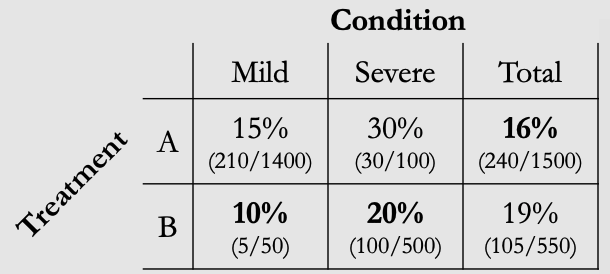

Suppose the causal graph is 

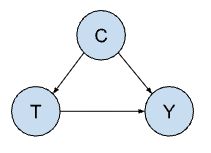

So 
* condition (C) decides treatment (T)
* both condition (C) and treatment (T) affect the outcome (Y)
* The sufficient adjustment set is $C$, let C=0 and 1 indicate mild and severe, respectively.

Then we have

\begin{align*}
\mathbb{E}[Y(t)]
&= \mathbb{E}_C \mathbb{E}[Y|t, C] \\
&= p(C=0) \mathbb{E}[Y|t, C=0] + p(C=1)\mathbb{E}][Y|t, C=1] \\
\end{align*}

Not, $t$ here means $do(T=t)$ and is not a random variable to be conditioned on.

So, given the total number of units is $1400 + 100 + 50 + 500 = 2050$

\begin{align*}
\mathbb{E}[Y(A)]
&= \frac{1400 + 50}{2050} 0.15 + \frac{100 + 500}{2050} 0.3 = 0.194 \\
\mathbb{E}[Y(B)]
&= \frac{1400 + 50}{2050} 0.1 + \frac{100 + 500}{2050} 0.2
= 0.129
\end{align*}

Therefore, treatment $B$ is better under the given causal graph.

Now, suppose the causal graph is instead

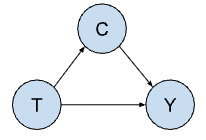

the only difference from previous one is that the arrow between C and T is reversed, i.e. treatment affects condition, e.g. a treatment may take too long that patient's condition worsened.

Then, since there is no confounding factor, 

\begin{align*}
\mathbb{E}[Y(A)]
&= \frac{210 + 30}{1400 + 100} = 0.16\\
\mathbb{E}[Y(B)]
&= \frac{5 + 100}{50 + 500} = 0.19
\end{align*}

which is the same as the `Total` column. The two equalities can be rewritten as

\begin{align*}
\mathbb{E}[Y(A)]
&= \frac{1400}{1500} 0.15 + \frac{100}{1500} 0.3 = 0.16\\
\mathbb{E}[Y(B)]
&= \frac{50}{550} 0.1 + \frac{500}{550} * 0.2 = 0.19
\end{align*}

for better comparability to those under the previous causal graph.